# **Analysis of Approximation Results**

In [1]:
import sys
sys.path
sys.path.append('c:\\Users\\3leso\\Documents\\Elena\\Uni\\MasterThesis\\MasterThesis_final\\code\\faultana')

In [2]:
subreddit = 'Ask_Politics'
k_max = 11
model = "Llama_3.3_70B_Instruct_scale"

import_path = f"output/{model}/optimization_data_{subreddit}_{model}_frac1.csv"
output_path = f"output/{model}/{subreddit}_{model}_approximation_edgelist.csv"
output_path_communities = f"output/{model}/{subreddit}_{model}_approximated_optimal_communities.csv"

# boxplot
num_iterations = 200



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [4]:
from script_faultana_functions import measures

## **Find optimal k***
based on lowest frustrated edges

In [5]:
# import data sets for different k

communities = {}
communities[subreddit] = {} # sub dictionary for different k's

for i in range (2, k_max):
    file_name = f"../../../R_MasterThesis/output/{subreddit}/{model}/{subreddit}_blockmodel_memberships_k=" + str(i) + ".csv"
    communities[subreddit][i] = pd.read_csv(file_name)
    communities[subreddit][i].rename(columns = {"cluster" : "Community", "id" : "Node"}, inplace = True)
    # transform to dictionary
    communities[subreddit][i] = communities[subreddit][i].set_index('Node')["Community"].to_dict()

communities

{'Ask_Politics': {2: {8611: 2,
   6880: 1,
   12419: 2,
   6822: 2,
   10438: 1,
   2768: 1,
   12655: 1,
   6264: 2,
   3967: 2,
   4325: 1,
   4044: 1,
   17013: 1,
   8221: 2,
   9264: 1,
   1460: 1,
   5546: 2,
   15444: 1,
   8471: 2,
   2317: 2,
   13888: 1,
   14449: 1,
   16456: 1,
   5912: 1,
   3921: 2,
   8973: 2,
   16397: 1,
   4887: 1,
   3191: 1,
   5075: 2,
   13022: 1,
   17112: 1,
   694: 2,
   9847: 1,
   12817: 2,
   11993: 1,
   3065: 1,
   14756: 1,
   14832: 2,
   7936: 1,
   2599: 1,
   2376: 1,
   4197: 2,
   12282: 2,
   13477: 1,
   13670: 1,
   10193: 1,
   10380: 2,
   415: 1,
   1112: 1,
   13179: 2,
   6040: 1,
   9078: 1,
   16193: 2,
   16043: 1,
   17341: 2,
   786: 1,
   4698: 2,
   11126: 2,
   4244: 2,
   11350: 2,
   195: 1,
   17797: 1,
   12597: 1,
   16916: 1,
   13389: 2,
   1255: 2,
   6503: 2,
   17272: 2,
   9136: 2,
   14139: 2,
   13851: 1,
   15579: 1,
   15090: 1,
   5973: 1,
   733: 2,
   10404: 2,
   14351: 2,
   831: 2,
   12031: 1,
 

In [6]:
# import edge list

net_sample = pd.read_csv(import_path)
net_sample

,source,target,user_1_id,user_2_id,sign
0,8611,10200,g8jh6lh,i4kbvbu,1
1,6880,15186,fsqbss8,fwkxx37,1
2,12419,13478,gt3s16g,gra3nqc,1
3,6822,3065,f1fpzvz,g78czp4,-1
4,6822,4197,f1fpzvz,dce4hul,-1
...,...,...,...,...,...
44087,10121,705,fzdljst,fwl0qku,1
44088,17489,14209,d6zd2tg,ctfsd5v,1
44089,17489,10115,d6zd2tg,fkqlew5,-1
44090,17489,1104,d6zd2tg,ctfsaor,1


In [7]:
# map communities of different k to df
for k in range (2, k_max):

    source_col = "source_comm_k" + str(k)
    target_col = "target_comm_k" + str(k)
    net_sample[source_col] = net_sample['source'].map(communities[subreddit][k])
    net_sample[target_col] = net_sample['target'].map(communities[subreddit][k])

In [8]:
net_sample

,source,target,user_1_id,user_2_id,sign,source_comm_k2,target_comm_k2,source_comm_k3,target_comm_k3,source_comm_k4,...,source_comm_k6,target_comm_k6,source_comm_k7,target_comm_k7,source_comm_k8,target_comm_k8,source_comm_k9,target_comm_k9,source_comm_k10,target_comm_k10
0,8611,10200,g8jh6lh,i4kbvbu,1,2,2,3,3,4,...,5,2,5,3,1,5,5,4,7,7
1,6880,15186,fsqbss8,fwkxx37,1,1,1,3,2,4,...,5,1,7,3,8,5,8,9,4,7
2,12419,13478,gt3s16g,gra3nqc,1,2,1,2,1,1,...,2,3,4,3,3,3,5,9,9,7
3,6822,3065,f1fpzvz,g78czp4,-1,2,1,2,2,1,...,2,1,6,5,8,4,5,6,2,6
4,6822,4197,f1fpzvz,dce4hul,-1,2,2,2,1,1,...,2,1,6,4,8,5,5,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44087,10121,705,fzdljst,fwl0qku,1,2,1,3,1,4,...,2,1,3,5,1,4,3,2,1,7
44088,17489,14209,d6zd2tg,ctfsd5v,1,2,2,2,1,4,...,2,6,1,2,8,1,7,9,5,7
44089,17489,10115,d6zd2tg,fkqlew5,-1,2,2,2,1,4,...,2,3,1,1,8,2,7,2,5,1
44090,17489,1104,d6zd2tg,ctfsaor,1,2,2,2,2,4,...,2,4,1,3,8,5,7,4,5,3


In [9]:
def frustrated_edge(row, source_comm, target_comm, sign):

    if (row[source_comm] == row[target_comm] and row[sign] == 1):
        return 0
    if (row[source_comm] == row[target_comm] and row[sign] == -1):
        return 1
    if (row[source_comm] != row[target_comm] and row[sign] == 1):
        return 1
    if (row[source_comm] != row[target_comm] and row[sign] == -1):
        return 0


frustration_per_k = {} 

for k in range(2, k_max):

    frustration_col = "frustration_k" + str(k)
    source_comm = "source_comm_k" + str(k)
    target_comm = "target_comm_k" + str(k)


    net_sample[frustration_col] = net_sample.apply(
        lambda row: frustrated_edge(row, source_comm, target_comm, 'sign'), axis = 1)
    
    frustration_per_k[str(k)] = net_sample[frustration_col].sum()
    


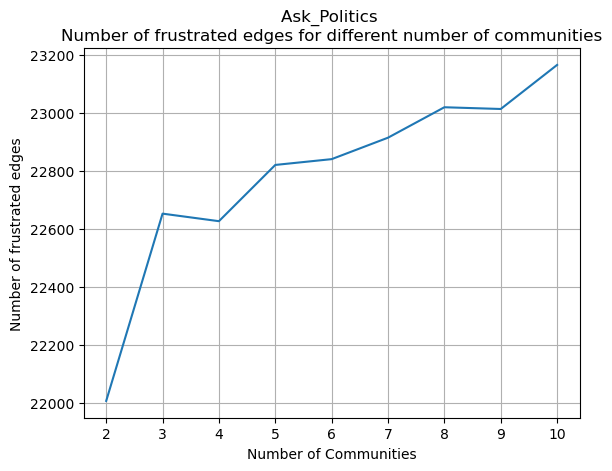

In [10]:
# make df and plot
frustration_df = pd.DataFrame(list(frustration_per_k.items()), columns=['k', 'frustration_count'])

plt.plot(frustration_df['k'], frustration_df['frustration_count'])
plt.xlabel("Number of Communities")
plt.ylabel("Number of frustrated edges")
plt.title(f"{subreddit} \nNumber of frustrated edges for different number of communities")
plt.grid(True)

In [11]:
# extract optimal k and communitied of this k

optim_k = int(frustration_df.loc[frustration_df['frustration_count'].idxmin(), 'k'])
communities_optimal = pd.DataFrame.from_dict(communities[subreddit][optim_k], orient='index').reset_index().rename(columns={'index' : "Node", 0 : 'Community'})

In [12]:

user_sample = set(list(net_sample['user_1_id']) + list(net_sample['user_2_id']))

user_count = len(user_sample)

- within cluster
    - negative edge --> 1
    - positive edge --> 3

- between cluster
    - negative edge --> -3
    - positive edge --> -1


In [13]:
net_sample

,source,target,user_1_id,user_2_id,sign,source_comm_k2,target_comm_k2,source_comm_k3,target_comm_k3,source_comm_k4,...,target_comm_k10,frustration_k2,frustration_k3,frustration_k4,frustration_k5,frustration_k6,frustration_k7,frustration_k8,frustration_k9,frustration_k10
0,8611,10200,g8jh6lh,i4kbvbu,1,2,2,3,3,4,...,7,0,0,1,1,1,1,1,1,0
1,6880,15186,fsqbss8,fwkxx37,1,1,1,3,2,4,...,7,0,1,1,1,1,1,1,1,1
2,12419,13478,gt3s16g,gra3nqc,1,2,1,2,1,1,...,7,1,1,0,1,1,1,0,1,1
3,6822,3065,f1fpzvz,g78czp4,-1,2,1,2,2,1,...,6,0,1,0,0,0,0,0,0,0
4,6822,4197,f1fpzvz,dce4hul,-1,2,2,2,1,1,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44087,10121,705,fzdljst,fwl0qku,1,2,1,3,1,4,...,7,1,1,1,1,1,1,1,1,1
44088,17489,14209,d6zd2tg,ctfsd5v,1,2,2,2,1,4,...,7,0,1,0,0,1,1,1,1,1
44089,17489,10115,d6zd2tg,fkqlew5,-1,2,2,2,1,4,...,1,1,0,0,0,0,1,0,0,0
44090,17489,1104,d6zd2tg,ctfsaor,1,2,2,2,2,4,...,3,0,0,0,1,1,1,1,1,1


In [14]:

balance_vals = {}
norm_coh_vals = {}
norm_div_vals= {}
coh_vals = {}
div_vals = {}
frustrated = {}

#for subreddit, net_data in net_samples.items():


print('Network with', user_count, 'nodes')
solution = communities_optimal
edgelist = net_sample[['source', 'target', 'user_1_id', 'user_2_id', 'sign']]

# extract node ids for both communities
users1 = solution[solution["Community"] == 1 ]['Node'].values
users2 = solution[solution["Community"] == 2 ]['Node'].values
size1 = len(users1)
size2 = len(users2)
total_users = size1 + size2
# print member-shares 
print(size1/total_users, size2/total_users)

# create dictionary user_id - community
dict_users = {}
for u in users1:
    dict_users[u] = 0
for u2 in users2:
    dict_users[u2] = 1

# reverse the dictionary: community - user_id
dict_inv = {v: k for k, v in dict_users.items()}
# add community-belonging for each node using the dictionary
edgelist['source_comm'] = edgelist['source']
edgelist['target_comm'] = edgelist['target']
edgelist.replace({'source_comm': dict_users, "target_comm" : dict_users}, inplace=True)

# do translation of within or between community and pos or neg to type
# within cluster
    ## negative edge --> 1
    ## positive edge --> 3

# between cluster
    ## negative edge --> -3
    ## positive edge --> -1
edgelist['type_of_edge'] = 2*(2*edgelist['source_comm']-1)*(2*edgelist['target_comm']-1)+((edgelist['sign']))
prop_negatives = edgelist[edgelist['sign'] == -1].shape[0]/edgelist.shape[0]

balance, total, frustration_negative, frustration_positive, total_negative, internal, coh, div = measures(edgelist['type_of_edge'])
print("Balance: ", balance)
print("Total: ", total)
print("Frustration negative: ", frustration_negative)
print("Frustration positive: ", frustration_positive)
print("Total negative: ", total_negative)
print("Internal: ", internal)
print('Cohesiveness: ', coh)
print('Divisiveness: ', div)

norm_div = div - prop_negatives
norm_coh = coh - (1-prop_negatives)

print('Norm Coh', norm_coh)
print('Norm Div', norm_div)

# save values
balance_vals[subreddit] = balance
frustrated[subreddit] = frustration_negative+frustration_positive
norm_coh_vals[subreddit] = norm_coh
norm_div_vals[subreddit] = norm_div
coh_vals[subreddit] = coh
div_vals[subreddit] = div

Network with 17909 nodes
0.5019822435646881 0.4980177564353119


C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\2099553217.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edgelist['source_comm'] = edgelist['source']
C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\2099553217.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edgelist['target_comm'] = edgelist['target']
C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\2099553217.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

Balance:  0.0017690283951736774
Total:  44092
Frustration negative:  10443
Frustration positive:  11564
Total negative:  20822
Internal:  22149
Cohesiveness:  0.5285114452119735
Divisiveness:  0.47299822266782116
Norm Coh 0.0007513073184780561
Norm Div 0.0007583605613165623


C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\2099553217.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edgelist['type_of_edge'] = 2*(2*edgelist['source_comm']-1)*(2*edgelist['target_comm']-1)+((edgelist['sign']))


Cohesiveness: proportion of internal edges that are positive

Divisiveness: proportion of external edges that are negative 

In [15]:
# weight_dict = {1: 1, -1 :0}
# net_samples['brexit']['weight'] = net_samples['brexit']['sign'].map(weight_dict)

net_sample

,source,target,user_1_id,user_2_id,sign,source_comm_k2,target_comm_k2,source_comm_k3,target_comm_k3,source_comm_k4,...,target_comm_k10,frustration_k2,frustration_k3,frustration_k4,frustration_k5,frustration_k6,frustration_k7,frustration_k8,frustration_k9,frustration_k10
0,8611,10200,g8jh6lh,i4kbvbu,1,2,2,3,3,4,...,7,0,0,1,1,1,1,1,1,0
1,6880,15186,fsqbss8,fwkxx37,1,1,1,3,2,4,...,7,0,1,1,1,1,1,1,1,1
2,12419,13478,gt3s16g,gra3nqc,1,2,1,2,1,1,...,7,1,1,0,1,1,1,0,1,1
3,6822,3065,f1fpzvz,g78czp4,-1,2,1,2,2,1,...,6,0,1,0,0,0,0,0,0,0
4,6822,4197,f1fpzvz,dce4hul,-1,2,2,2,1,1,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44087,10121,705,fzdljst,fwl0qku,1,2,1,3,1,4,...,7,1,1,1,1,1,1,1,1,1
44088,17489,14209,d6zd2tg,ctfsd5v,1,2,2,2,1,4,...,7,0,1,0,0,1,1,1,1,1
44089,17489,10115,d6zd2tg,fkqlew5,-1,2,2,2,1,4,...,1,1,0,0,0,0,1,0,0,0
44090,17489,1104,d6zd2tg,ctfsaor,1,2,2,2,2,4,...,3,0,0,0,1,1,1,1,1,1


In [16]:
communities_optimal.to_csv(output_path_communities, index=False)

In [17]:
net_sample.to_csv(output_path, index = False)

*** 
# **Boxplots**

In [20]:
# import data
import_boxplot_path = f"../../../R_MasterThesis/output/{subreddit}/{model}/{subreddit}_blockmodel_memberships_k=" + str(optim_k) + f"_{num_iterations}reps" + ".csv"
data_200iter = pd.read_csv(import_boxplot_path)
data_200iter

# net sample 
net_sample_iter = pd.read_csv(import_path)
net_sample_iter

,source,target,user_1_id,user_2_id,sign
0,8611,10200,g8jh6lh,i4kbvbu,1
1,6880,15186,fsqbss8,fwkxx37,1
2,12419,13478,gt3s16g,gra3nqc,1
3,6822,3065,f1fpzvz,g78czp4,-1
4,6822,4197,f1fpzvz,dce4hul,-1
...,...,...,...,...,...
44087,10121,705,fzdljst,fwl0qku,1
44088,17489,14209,d6zd2tg,ctfsd5v,1
44089,17489,10115,d6zd2tg,fkqlew5,-1
44090,17489,1104,d6zd2tg,ctfsaor,1


In [21]:
# make dictionary

communities_200iter = {}
communities_200iter[subreddit] = {} # sub dictionary for different reps

for i in range (1, num_iterations + 1):
    communities_200iter[subreddit][i] = data_200iter[['id', f"cluster {i}"]].set_index('id')[f"cluster {i}"].to_dict()
    
#communities_200iter['Ask_Politics'][4]

In [22]:
# match communities per iteration to net_sample

for i in range (1, num_iterations + 1):

    source_col = "source_comm_" + str(i)
    target_col = "target_comm_" + str(i)
    net_sample_iter[source_col] = net_sample_iter['source'].map(communities_200iter[subreddit][i])
    net_sample_iter[target_col] = net_sample_iter['target'].map(communities_200iter[subreddit][i])

net_sample_iter

C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\3576337986.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  net_sample_iter[source_col] = net_sample_iter['source'].map(communities_200iter[subreddit][i])
C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\3576337986.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  net_sample_iter[target_col] = net_sample_iter['target'].map(communities_200iter[subreddit][i])
C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\3576337986.py:7: PerformanceWarning: DataFrame is highly fragmented.

,source,target,user_1_id,user_2_id,sign,source_comm_1,target_comm_1,source_comm_2,target_comm_2,source_comm_3,...,source_comm_196,target_comm_196,source_comm_197,target_comm_197,source_comm_198,target_comm_198,source_comm_199,target_comm_199,source_comm_200,target_comm_200
0,8611,10200,g8jh6lh,i4kbvbu,1,2,1,2,1,2,...,1,2,1,1,2,2,1,1,2,2
1,6880,15186,fsqbss8,fwkxx37,1,1,2,1,2,2,...,1,1,2,1,2,2,2,2,1,1
2,12419,13478,gt3s16g,gra3nqc,1,2,2,1,2,2,...,1,2,2,2,1,1,1,2,1,1
3,6822,3065,f1fpzvz,g78czp4,-1,1,2,1,1,2,...,2,1,1,2,2,1,2,1,1,2
4,6822,4197,f1fpzvz,dce4hul,-1,1,2,1,1,2,...,2,1,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44087,10121,705,fzdljst,fwl0qku,1,1,1,2,1,1,...,1,1,2,1,2,1,2,2,2,1
44088,17489,14209,d6zd2tg,ctfsd5v,1,2,1,2,1,2,...,1,2,1,1,1,1,1,2,2,1
44089,17489,10115,d6zd2tg,fkqlew5,-1,2,2,2,2,2,...,1,2,1,2,1,2,1,1,2,2
44090,17489,1104,d6zd2tg,ctfsaor,1,2,1,2,2,2,...,1,2,1,1,1,1,1,1,2,1


In [23]:
# def frustrated_edge(row, source_comm, target_comm, sign):

#     if (row[source_comm] == row[target_comm] and row[sign] == 1):
#         return 0
#     if (row[source_comm] == row[target_comm] and row[sign] == -1):
#         return 1
#     if (row[source_comm] != row[target_comm] and row[sign] == 1):
#         return 1
#     if (row[source_comm] != row[target_comm] and row[sign] == -1):
#         return 0

# compute frustrated edges per iteration

frustration_per_i = {} 

for i in range(1, num_iterations + 1):

    frustration_col = "frustration_i" + str(i)
    source_comm = "source_comm_" + str(i)
    target_comm = "target_comm_" + str(i)


    net_sample_iter[frustration_col] = net_sample_iter.apply(
        lambda row: frustrated_edge(row, source_comm, target_comm, 'sign'), axis = 1)
    
    frustration_per_i[str(i)] = net_sample_iter[frustration_col].sum()
    
# make df
frustration_df_iter = pd.DataFrame(list(frustration_per_i.items()), columns=['i', 'frustration_count'])
frustration_df_iter

C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\101939099.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  net_sample_iter[frustration_col] = net_sample_iter.apply(
C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\101939099.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  net_sample_iter[frustration_col] = net_sample_iter.apply(
C:\Users\3leso\AppData\Local\Temp\ipykernel_24784\101939099.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

,i,frustration_count
0,1,22155
1,2,22244
2,3,21988
3,4,21990
4,5,22269
...,...,...
195,196,21995
196,197,22124
197,198,22061
198,199,22024


Text(0.5, 0, 'Number of Communities = 2')

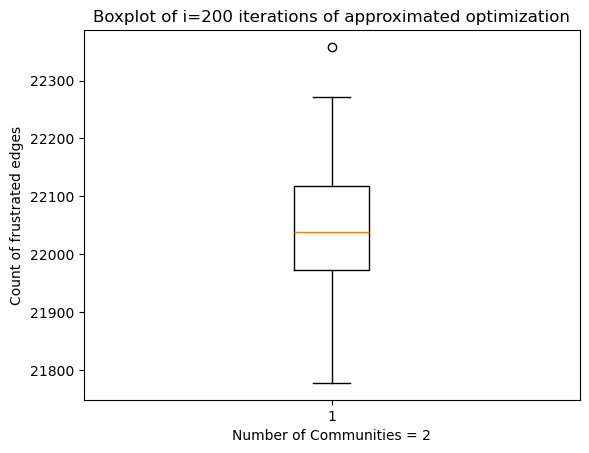

In [24]:
# plot 

plt.boxplot(frustration_df_iter['frustration_count'])
plt.title("Boxplot of i=200 iterations of approximated optimization")
plt.ylabel("Count of frustrated edges")
plt.xlabel("Number of Communities = 2")

In [26]:
# optimal i
optim_i = frustration_df_iter[frustration_df_iter['frustration_count'] == frustration_df_iter['frustration_count'].min()]['i'].values
optim_i


array(['194'], dtype=object)